In [26]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/weightLogInfo_merged.csv")

df.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [27]:
df.tail()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000
66,8877689391,5/12/2016 6:42:53 AM,84.000000,185.188300,NaN,25.139999,False,1463035373000


In [28]:
df.shape

(67, 8)

In [29]:
df.describe()

,Id,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,1.950322e+09,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,133.500000,294.317120,25.00000,47.540001,1.463098e+12


In [30]:
df.columns

Index(['Id', 'Date', 'WeightKg', 'WeightPounds', 'Fat', 'BMI',
       'IsManualReport', 'LogId'],
      dtype='object')

In [31]:
#changing all the proper camel-case names to lowercase
df.rename({'Id': 'ID', 'Date': 'date', 'WeightPounds': 'weight pounds',
           'Fat': 'fat', 'WeightKg': 'weight kg', 'LogId': 'log id', 'IsManualReport': 'is manual report'}, axis=1, inplace=True)

df.columns

Index(['ID', 'date', 'weight kg', 'weight pounds', 'fat', 'BMI',
       'is manual report', 'log id'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                67 non-null     int64  
 1   date              67 non-null     object 
 2   weight kg         67 non-null     float64
 3   weight pounds     67 non-null     float64
 4   fat               2 non-null      float64
 5   BMI               67 non-null     float64
 6   is manual report  67 non-null     bool   
 7   log id            67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [33]:
#convert "date" column to datetime data type
df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                67 non-null     int64         
 1   date              67 non-null     datetime64[ns]
 2   weight kg         67 non-null     float64       
 3   weight pounds     67 non-null     float64       
 4   fat               2 non-null      float64       
 5   BMI               67 non-null     float64       
 6   is manual report  67 non-null     bool          
 7   log id            67 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 3.9 KB


In [34]:
df.nunique()

ID                   8
date                56
weight kg           34
weight pounds       34
fat                  2
BMI                 36
is manual report     2
log id              56
dtype: int64

In [35]:
df.isnull().sum()

ID                   0
date                 0
weight kg            0
weight pounds        0
fat                 65
BMI                  0
is manual report     0
log id               0
dtype: int64

In [36]:
if df is None:
  print("DataFrame is not defined. Cannot fill missing values.")
else:
  if df.empty:
    print("DataFrame is empty. Cannot fill missing values.")
  else:
    df['fat'] = df['fat'].fillna(df['fat'].mode()[0])

print(df)

            ID                date   weight kg  weight pounds   fat  \
0   1503960366 2016-05-02 23:59:59   52.599998     115.963147  22.0   
1   1503960366 2016-05-03 23:59:59   52.599998     115.963147  22.0   
2   1927972279 2016-04-13 01:08:52  133.500000     294.317120  22.0   
3   2873212765 2016-04-21 23:59:59   56.700001     125.002104  22.0   
4   2873212765 2016-05-12 23:59:59   57.299999     126.324875  22.0   
..         ...                 ...         ...            ...   ...   
62  8877689391 2016-05-06 06:43:35   85.000000     187.392923  22.0   
63  8877689391 2016-05-08 07:35:53   85.400002     188.274775  22.0   
64  8877689391 2016-05-09 06:39:44   85.500000     188.495234  22.0   
65  8877689391 2016-05-11 06:51:47   85.400002     188.274775  22.0   
66  8877689391 2016-05-12 06:42:53   84.000000     185.188300  22.0   

          BMI  is manual report         log id  
0   22.650000              True  1462233599000  
1   22.650000              True  1462319999000  


**DATA VISUALISATION**

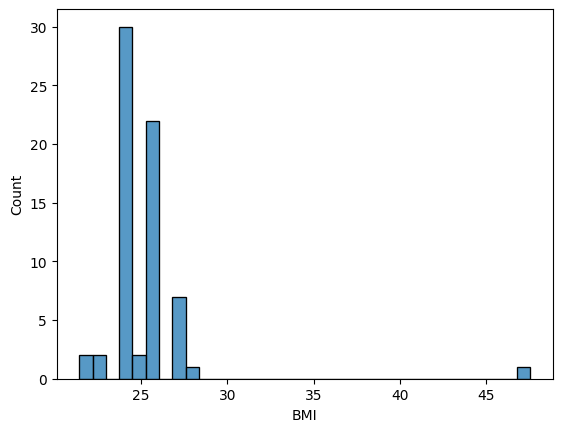

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x='BMI', data=df, )
plt.show()

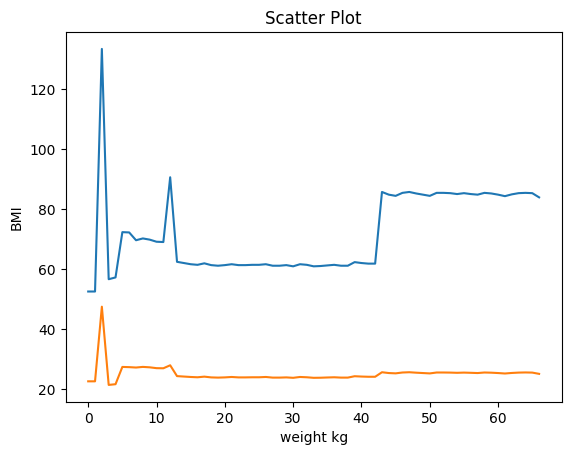

In [38]:
#scatterplot with weight kg against very BMI
plt.plot(df['weight kg'])
plt.plot(df['BMI'])

plt.title("Scatter Plot")

plt.xlabel('weight kg')
plt.ylabel('BMI')

plt.show()